## Vector Error Correction Model (VECM)

If 2 (or more) time series are non-stationary, there may be a linear combination of the 2 that is stationary. Otherwise known as 2 variables being cointegrated. If they are indeed cointegrated, we can estimate an error correction model. A vector error correction model (VECM) is an augmented VAR in first differences. Augmented by the error-correction term. 

In [3]:
import Haver
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
from statsmodels.tsa.api import VECM
from statsmodels.tsa.api import coint
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox as lb

In [4]:
Haver.path()

'R:\\\\'

In [5]:
Haver.path("C:\\Users\\RNAMG01\\Desktop\\python haver training\\US1PLUS\\")

In [6]:
Haver.path()

'C:\\Users\\RNAMG01\\Desktop\\python haver training\\US1PLUS'

In [7]:
df=Haver.data(['pcu','pa'], 'us1plus', dates=True)



In [8]:
df=df.dropna()

In [9]:
df.head()

,pcu,pa
1947-01-31,21.48,24.5
1947-02-28,21.62,24.7
1947-03-31,22.00,25.3
1947-04-30,22.00,25.1
1947-05-31,21.95,25.0


In [10]:
df.tail()

,pcu,pa
2018-07-31,251.286,204.3
2018-08-31,251.846,203.0
2018-09-30,251.994,203.2
2018-10-31,252.827,204.3
2018-11-30,252.876,201.5


If you think 2 series might have a long-run relationship it makes sense to take a quick look at their behaviour on a graph.

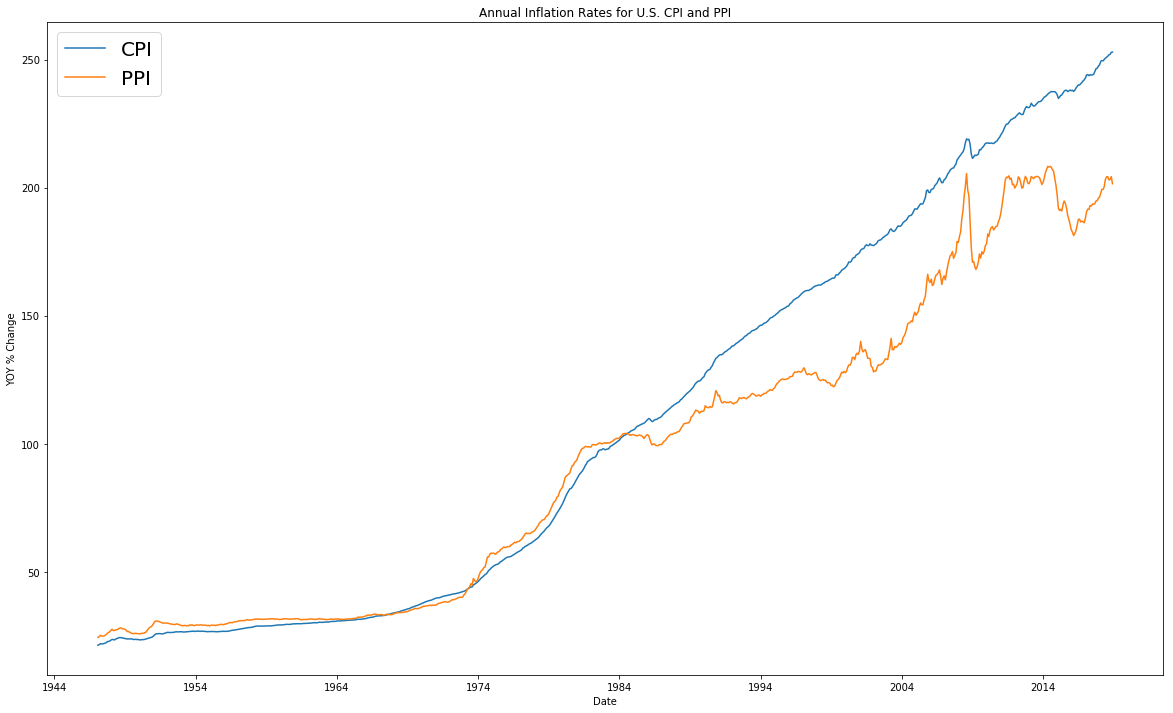

In [11]:
fig = plt.figure(figsize=(20,12))
fig= plt.plot(df, label=['CPI', 'PPI'])
plt.xlabel("Date")
plt.ylabel("YOY % Change")
plt.title('Annual Inflation Rates for U.S. CPI and PPI')
plt.legend(['CPI','PPI'], fontsize="20")
plt.show()

You have learned other techniques to test for stationarity. Both the ACF and Q-Ljung Box test can help.

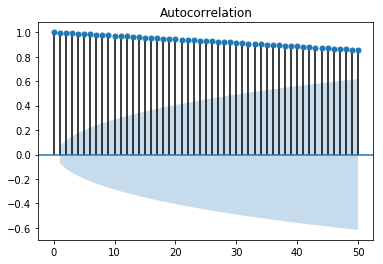

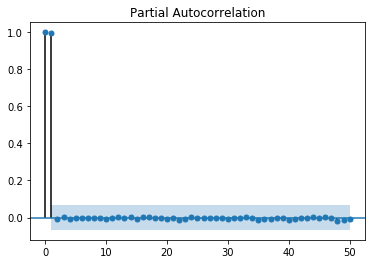

In [12]:
x=plot_acf(df['pcu'], lags=50)
y=plot_pacf(df['pcu'], lags=50)

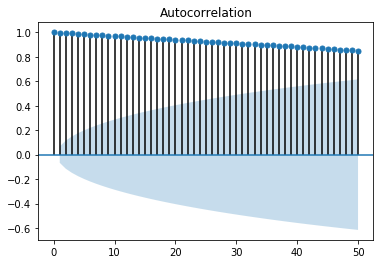

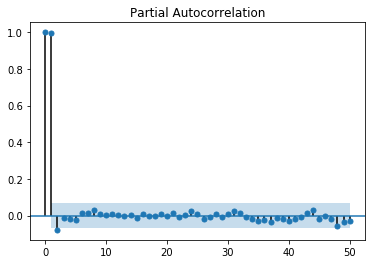

In [13]:
x=plot_acf(df['pa'], lags=50)
y=plot_pacf(df['pa'], lags=50)

In [14]:
lb(df['pcu'], lags=25, boxpierce=False)

(array([  861.05086185,  1718.11950643,  2571.23319148,  3420.37635498,
         4265.55128223,  5106.76089858,  5944.00406535,  6777.28923748,
         7606.63441166,  8432.01073881,  9253.41517587, 10070.89761187,
        10884.4715265 , 11694.15875067, 12499.94180062, 13301.85880179,
        14099.94006067, 14894.1751121 , 15684.55347968, 16471.04523823,
        17253.64513924, 18032.31189342, 18807.02479817, 19577.82440634,
        20344.72559839]),
 array([2.878086e-189, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000]))

In [15]:
lb(df['pa'], lags=25, boxpierce=False)

(array([  861.0054619 ,  1717.56830584,  2569.5849484 ,  3416.96227759,
         4259.56684898,  5097.46499276,  5930.7771085 ,  6759.71926045,
         7584.39713236,  8404.8674692 ,  9221.20188977, 10033.44293269,
        10841.60818555, 11645.73433547, 12445.77695389, 13241.789074  ,
        14033.77014871, 14821.72925133, 15605.71422307, 16385.72470341,
        17161.84171368, 17934.04353751, 18702.34948114, 19466.9111091 ,
        20227.80966635]),
 array([2.9442431e-189, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000]))

You have now looked at the time series graphically, and tested the autoregressive sructure of the data. We can now formally test for non-stationarity using a unit root test.

In [16]:
result = adfuller(df['pcu'], autolag="AIC")


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.921065
p-value: 0.998561
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [17]:
result = adfuller(df['pa'], autolag="AIC")


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.695251
p-value: 0.989743
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


If you conclude that both series have unit roots (are non-stationary), you can test for cointegration statistically using the Engel-Granger Cointegration test.

In [18]:
eg_test=coint(df['pcu'], df['pa'])

In [19]:
print(eg_test)

(-2.217542078054682, 0.41533672008363776, array([-3.90919034, -3.34322747, -3.04937385]))


To estimate a VECM model, you need to start by performing lag selection on the underlying VAR.

In [20]:
model1=VAR(df)

In [21]:
results = model1.fit(maxlags=20, ic='bic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 18, Jan, 2019
Time:                     12:10:19
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.79026
Nobs:                     860.000    HQIC:                  -2.83805
Log likelihood:          -1193.47    FPE:                  0.0568298
AIC:                     -2.86770    Det(Omega_mle):       0.0559158
--------------------------------------------------------------------
Results for equation pcu
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.047686         0.024457            1.950           0.051
L1.pcu         1.380415         0.046525           29.670           0.000
L1.pa          0.067087         0.014701            4.563           0.000
L2.pcu        -0

To estimate a VECM you need to provide arguments for both the underlying data and also the number of lags. Since a VECM is an augmented VAR in first differences, you will take the numbner of lags you found in the prior step and subtract 1.

In [22]:
model = VECM(df, k_ar_diff=2)
results = model.fit()
results.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.pcu,0.3867,0.046,8.351,0.000,0.296,0.477
L1.pa,0.0624,0.015,4.300,0.000,0.034,0.091
L2.pcu,-0.1528,0.045,-3.363,0.001,-0.242,-0.064
L2.pa,0.0147,0.015,1.003,0.316,-0.014,0.043
,coef,std err,z,P>|z|,[0.025,0.975]
L1.pcu,0.2964,0.147,2.022,0.043,0.009,0.584
L1.pa,0.3155,0.046,6.865,0.000,0.225,0.406
L2.pcu,-0.5077,0.144,-3.531,0.000,-0.790,-0.226
L2.pa,0.2279,0.046,4.914,0.000,0.137,0.319
,coef,std err,z,P>|z|,[0.025,0.975]


In [23]:
vecmf=results.predict(24)

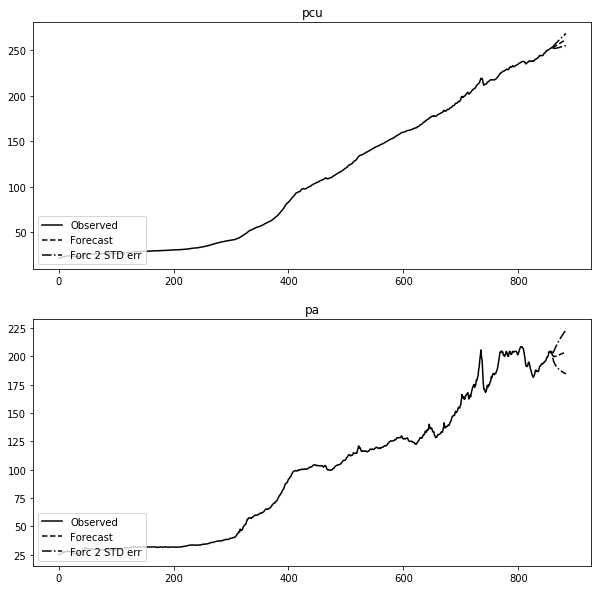

In [24]:
results.plot_forecast(24)

In [25]:
vecmf= pd.DataFrame(vecmf, columns=['CPI', 'PPI'])

In [26]:
vecmf

,CPI,PPI
0,252.911745,200.655478
1,253.121536,199.929676
2,253.431516,199.741863
3,253.786656,199.690642
4,254.158739,199.766566
5,254.539497,199.895223
6,254.925554,200.063052
7,255.315151,200.252160
8,255.706925,200.455081
9,256.099968,200.665922


If you wanted to take the monthly forecasts and transform them into annualized inflation numbers, it is easiet enough!

In [27]:
vecmf_inf = np.log(vecmf).diff(12).dropna()

In [28]:
vecmf_inf*100

,CPI,PPI
12,1.713228,0.330686
13,1.783443,0.802798
14,1.813940,1.006670
15,1.826530,1.142231
16,1.832379,1.214082
17,1.834760,1.259470
18,1.835008,1.285200
19,1.833820,1.300239
20,1.831735,1.308334
21,1.829112,1.312436
